## ***SMS Classifier : Develop a text classification model to classify SMS as either spam or non-spam using data science techniques in Python***

# Importing the Dependencies


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Data Collection and Pre-Processing

In [ ]:
# loading data from csv file to a pandas dataframe
df = pd.read_csv('/content/sms_dataset.csv', encoding='latin-1')

In [ ]:
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
#replace the null values with a null string
sms_data = df.where((pd.notnull(df)),'')

In [ ]:
#printing the first 5 rows of the dataframe
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,"Go until jurong point, crazy.. Available only ...",,,
1,1,Ok lar... Joking wif u oni...,,,
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,1,U dun say so early hor... U c already then say...,,,
4,1,"Nah I don't think he goes to usf, he lives aro...",,,


In [ ]:
#checking the number of rows and columns in the dataframe
sms_data.shape

(5572, 5)

In [ ]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  5572 non-null   object
 3   Unnamed: 3  5572 non-null   object
 4   Unnamed: 4  5572 non-null   object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
sms_data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,5572,5572,5572
unique,2,5169,44,11,6
top,1,"Sorry, I'll call later",,,
freq,4825,30,5522,5560,5566


# Label Encoding

In [ ]:
#label spam sms as 0; ham sms as 1;

sms_data.loc[sms_data['v1'] == 'spam', 'v1',] = 0
sms_data.loc[sms_data['v1'] == 'ham', 'v1',] = 1


spam = 0

ham = 1

In [ ]:
#separating the data as texts and labels
X = sms_data['v2']
Y = sms_data['v1']

In [ ]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [ ]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object

# Spliting data into "Train data" & "Test data"

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [ ]:
print(X.shape)
print(X_train)
print(X_test)

(5572,)
1457    CLAIRE here am havin borin time & am now alone...
472     Nothing. I meant that once the money enters yo...
2481                    K.:)do it at evening da:)urgent:)
243     Although i told u dat i'm into baig face watch...
1413    Dear U've been invited to XCHAT. This is our f...
                              ...                        
3671     came to look at the flat, seems ok, in his 50...
709     4mths half price Orange line rental & latest c...
2487    K ill drink.pa then what doing. I need srs mod...
174     Well, i'm gonna finish my bath now. Have a goo...
1146                            Babe ? I lost you ... :-(
Name: v2, Length: 4457, dtype: object
4004    , ow u dey.i paid 60,400thousad.i told  u woul...
2276                         Love you aathi..love u lot..
4498    SMS SERVICES. for your inclusive text credits,...
3755     Yes:)here tv is always available in work place..
111                       Going for dinner.msg you after.
                          

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


# Feature Extraction

In [ ]:
#transform text data into feature vectors to use them as inputs in logistics

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

# Fit the vectorizer to the training data and transform it to test data using fitted vectorizer

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

#convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train)

1457    CLAIRE here am havin borin time & am now alone...
472     Nothing. I meant that once the money enters yo...
2481                    K.:)do it at evening da:)urgent:)
243     Although i told u dat i'm into baig face watch...
1413    Dear U've been invited to XCHAT. This is our f...
                              ...                        
3671     came to look at the flat, seems ok, in his 50...
709     4mths half price Orange line rental & latest c...
2487    K ill drink.pa then what doing. I need srs mod...
174     Well, i'm gonna finish my bath now. Have a goo...
1146                            Babe ? I lost you ... :-(
Name: v2, Length: 4457, dtype: object


In [ ]:
print(X_train_features)

  (0, 4342)	0.2752660426445784
  (0, 1579)	0.25228874452047967
  (0, 7332)	0.22665809194518172
  (0, 4120)	0.20242973085540436
  (0, 3385)	0.16326391252550673
  (0, 245)	0.28870690041506675
  (0, 1706)	0.19110100352911208
  (0, 407)	0.24275230416686927
  (0, 2076)	0.22931144639638096
  (0, 7085)	0.2012241713066945
  (0, 6637)	0.14222571884812368
  (0, 1393)	0.2752660426445784
  (0, 3266)	0.265729602290968
  (0, 1784)	0.5505320852891568
  (1, 1979)	0.1257583256379714
  (1, 2237)	0.14883487154459094
  (1, 5799)	0.16540907045144923
  (1, 4960)	0.1412201605131965
  (1, 730)	0.19167855419831323
  (1, 6785)	0.17228798451830185
  (1, 6381)	0.1298912590754371
  (1, 1696)	0.18634285391994415
  (1, 2273)	0.41650550621034316
  (1, 1189)	0.19167855419831323
  (1, 5484)	0.19855746826516588
  :	:
  (4453, 3892)	0.21046154167831976
  (4453, 4794)	0.21439075808325483
  (4453, 3215)	0.20272493642163564
  (4453, 2909)	0.2934531865831572
  (4453, 3987)	0.20693263607831452
  (4453, 4985)	0.164634973447087

In [ ]:
print(X_train_features.shape)

(4457, 7425)


In [ ]:
print(X_test_features)

  (0, 6683)	0.45457749771706124
  (0, 4857)	0.6459495663460438
  (0, 2245)	0.6132768186607519
  (1, 4084)	0.6623713587475228
  (1, 4072)	0.43421359538199156
  (1, 739)	0.6105102265289294
  (2, 7319)	0.1442623916907971
  (2, 6904)	0.1962534005038059
  (2, 6537)	0.1265549048338045
  (2, 6253)	0.13164649171059342
  (2, 6036)	0.16071205523534848
  (2, 5817)	0.1962534005038059
  (2, 5051)	0.1394068528390571
  (2, 4581)	0.18475020655252494
  (2, 4039)	0.21591824045012645
  (2, 3541)	0.22742143440140736
  (2, 3303)	0.15813115249460213
  (2, 3124)	0.2210907699412235
  (2, 2670)	0.20775659445508685
  (2, 2034)	0.20775659445508685
  (2, 1902)	0.4548428688028147
  (2, 1825)	0.24708627434772795
  (2, 1694)	0.1880917545087663
  (2, 728)	0.23558308039644696
  (2, 465)	0.23558308039644696
  :	:
  (1113, 6997)	0.25297682831026397
  (1113, 6921)	0.15797597438554686
  (1113, 6911)	0.27600786709289427
  (1113, 6548)	0.2512588352099743
  (1113, 6537)	0.1800685043145791
  (1113, 4988)	0.2827512967208603
  

In [ ]:
print(X_test_features.shape)

(1115, 7425)


# Training the Model



Logistic Regression

In [ ]:
model=LogisticRegression()

In [ ]:
#training the logistic regression model with the training data

model.fit(X_train_features,Y_train)

LogisticRegression()

# Evaluating the Trained Model

Method 1 :

In [ ]:
#prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data :',accuracy_on_training_data)

Accuracy on training data : 0.9670181736594121


In [ ]:
#prediction on testing data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9596412556053812


Method 2 : Confusion Matrix

In [ ]:
# Make predictions

predictions = model.predict(X_test_features)


# Import necessary function

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Evaluate the model

accuracy = accuracy_score(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)
classification_rep = classification_report(Y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9596412556053812
Confusion Matrix:
[[129  45]
 [  0 941]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85       174
           1       0.95      1.00      0.98       941

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



Visualising Confusion Matrix

In [ ]:
# Import necessary library
import seaborn as sns
import matplotlib.pyplot as plt

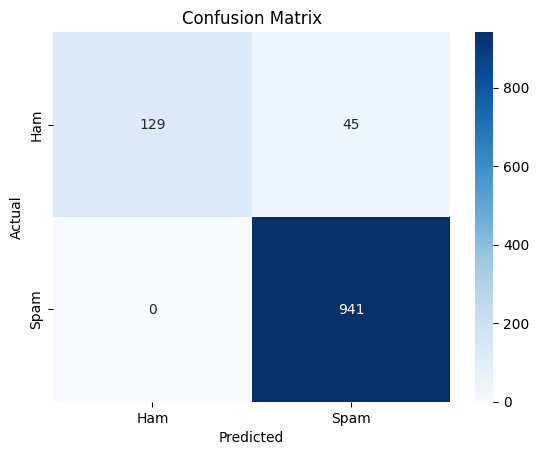

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Building a Predictive System

Trial 1

In [ ]:
input_sms = ("Sorry, I'll call later in meeting.")

# Convert the single string into a list
input_sms_list = [input_sms]

# Convert text to feature vectors
input_data_features = feature_extraction.transform(input_sms_list)

#predicting spam or ham

prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Ham SMS')
else:
  print('Spam SMS')

[1]
Ham SMS


Trial 2

In [ ]:
input_sms = ("Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or å£1000. To claim txt DIS to 87121 18+6*å£1.50(moreFrmMob. ShrAcomOrSglSuplt)10, LS1 3AJ")

# Convert the single string into a list
input_sms_list = [input_sms]

# Convert text to feature vectors
input_data_features = feature_extraction.transform(input_sms_list)

#predicting spam or ham

prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Ham SMS')
else:
  print('Spam SMS')

[0]
Spam SMS
